# Importação Das Bibliotecas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Funções Auxiliares

In [30]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(17):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [31]:
def arrumaDataFrame(resultados):
    resultados_dataframe = {}
    for column in range(len(resultados.columns[:-5])):
        coluna_aux = []
        for element in range(len(resultados)):
            coluna_aux.append(np.array([float(elemento) for elemento in resultados.iloc[element,column][1:-1].split(',')]))
        
        resultados_dataframe[resultados.columns[column]] = coluna_aux


    for column in resultados.columns[4:]:
        resultados_dataframe[column] = resultados[column]


    return pd.DataFrame(resultados_dataframe)

In [32]:
def dataFrame_to_boxPlot(dataFrame,var):
    data = {}
    column_value = []
    column_x = []

    for column in range(len(dataFrame.columns)):
        column_value += list(dataFrame.iloc[:,column])
        column_x += [f'x{column+1}' for i in range(len(dataFrame))]

    data[var]=column_value
    data['x']=column_x
    return pd.DataFrame(data)

# Importação Dos Dados

In [33]:
resultados_np = pd.read_csv("../Resultados/tabelas/Resultados_pi/resultados_pi_np.csv").iloc[:,1:]
resultados_sar = pd.read_csv("../Resultados/tabelas/Resultados_pi/resultados_pi_sar.csv").iloc[:,1:]
resultados_treino = pd.read_csv("../Resultados/tabelas/Resultados_pi/resultados_pi_treino.csv").iloc[:,1:]

In [34]:
resultados_np = arrumaDataFrame(resultados_np)
resultados_sar = arrumaDataFrame(resultados_sar)
resultados_treino = arrumaDataFrame(resultados_treino)

# Análise Dos Resultados

## Análise do Resultados X

In [35]:
result_x_np = describe_var(resultados_np,'x')
result_x_sar = describe_var(resultados_sar,'x')
result_x_treino = describe_var(resultados_treino,'x')

In [36]:
boxPlot_x_np = dataFrame_to_boxPlot(result_x_np,'value')
boxPlot_x_sar = dataFrame_to_boxPlot(result_x_sar,'value')
boxPlot_x_treino = dataFrame_to_boxPlot(result_x_treino,'value')

c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

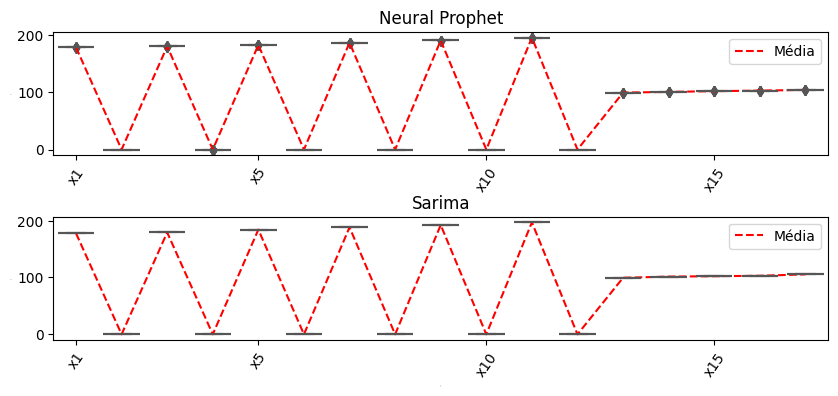

In [37]:
fig=plt.figure(figsize=(10,4))
#fig.suptitle('Distribuição da Produção por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(2,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_x_np,x='x',y='value',color='turquoise')
plt.plot(result_x_np.columns,result_x_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(2,1,2)
ax.set_title('Sarima')
sns.boxplot(data=boxPlot_x_sar,x='x',y='value',color='turquoise')
plt.plot(result_x_sar.columns,result_x_sar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_sar.columns)/5)+1)])
plt.legend()


plt.savefig('../Resultados/img/ResultX.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [38]:
boxPlot_x_treino['year'] = [2015+j for i in range(17) for j in range(4)]

In [39]:
boxPlot_x_treino

,value,x,year
0,178.0,x1,2015
1,177.0,x1,2016
2,178.0,x1,2017
3,180.0,x1,2018
4,0.0,x2,2015
...,...,...,...
63,102.0,x16,2018
64,105.0,x17,2015
65,105.0,x17,2016
66,106.0,x17,2017


In [40]:
result_s_np = describe_var(resultados_np,'s')
result_s_sar = describe_var(resultados_sar,'s')
result_s_treino = describe_var(resultados_treino,'s')

boxPlot_s_np = dataFrame_to_boxPlot(result_s_np,'value')
boxPlot_s_sar = dataFrame_to_boxPlot(result_s_sar,'value')
boxPlot_s_treino = dataFrame_to_boxPlot(result_s_treino,'value')

c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marcio Barros\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


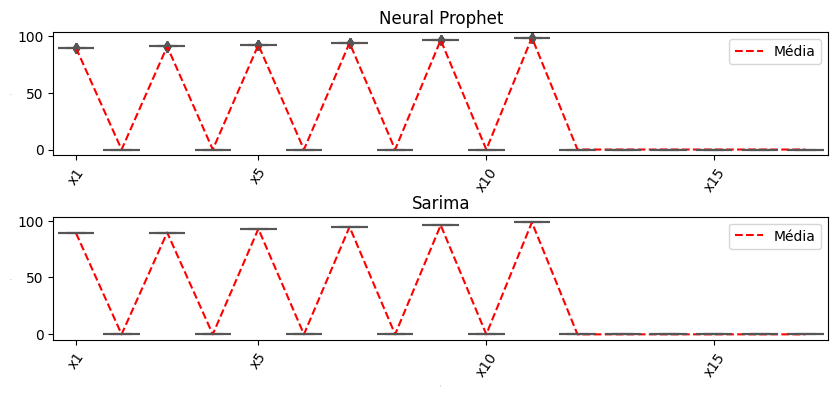

In [41]:
fig=plt.figure(figsize=(10,4))
#fig.suptitle('Distribuição do Estoque por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(2,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_s_np,x='x',y='value',color='turquoise')
plt.plot(result_s_np.columns,result_s_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(2,1,2)
ax.set_title('Sarima')
sns.boxplot(data=boxPlot_s_sar,x='x',y='value',color='turquoise')
plt.plot(result_s_sar.columns,result_s_sar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_sar.columns)/5)+1)])
plt.legend()


plt.savefig('../Resultados/img/ResultS.png', format='png', bbox_inches='tight',pad_inches = 0.1)

## Análise do Resultados RunTime

## Análise do Resultados OBbjBound/ OBbjVal

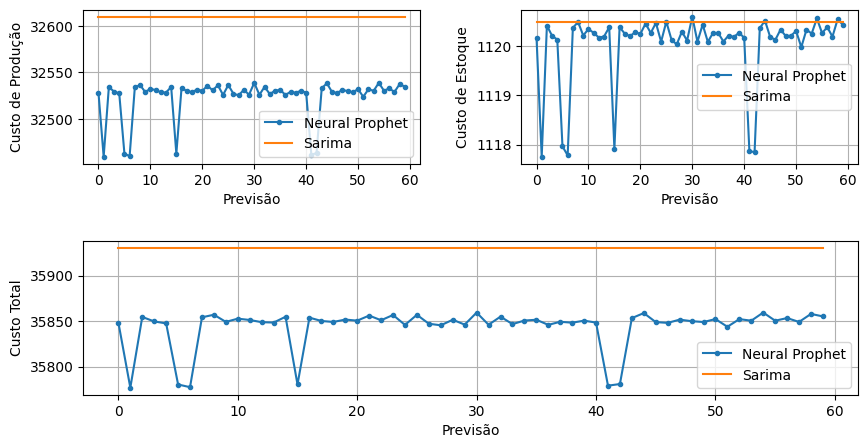

In [42]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

ax=fig.add_subplot(2,1,2)
plt.plot(resultados_np['ObjVal'],label='Neural Prophet',marker='.')
plt.plot(resultados_sar['ObjVal'],label='Sarima')
plt.xlabel('Previsão')
plt.ylabel('Custo Total')
plt.grid(axis='both')
plt.legend()

ax=fig.add_subplot(2,2,2)
plt.plot(result_s_np.sum(axis=1)*2,label='Neural Prophet',marker='.')
plt.plot(result_s_sar.sum(axis=1)*2,label='Sarima')
plt.xlabel('Previsão')
plt.ylabel('Custo de Estoque')
plt.grid(axis='both')
plt.legend()


ax=fig.add_subplot(2,2,1)
plt.plot(result_x_np.sum(axis=1)*20,label='Neural Prophet',marker='.')
plt.plot(result_x_sar.sum(axis=1)*20,label='Sarima')
plt.xlabel('Previsão')
plt.ylabel('Custo de Produção')
plt.grid(axis='both')
plt.legend()

In [43]:
previsoes_np = {}
previsoes = []
for index in range(60):
    with open(f'../Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_np['demandas'] = previsoes
previsoes_np = pd.DataFrame(previsoes_np)
previsoes_np.head()

,demandas
0,"[89.54337310791016, 89.25847625732422, 90.0580..."
1,"[89.42227172851562, 89.07727813720703, 89.8582..."
2,"[89.5674057006836, 89.30921173095703, 90.11029..."
3,"[89.55894470214844, 89.2660140991211, 90.06253..."
4,"[89.55184936523438, 89.26032257080078, 90.0593..."


In [44]:
previsao_demanda_np = describe_var(previsoes_np,'demandas')

In [45]:
previsao_demanda_np.describe()

,demandas1,demandas2,demandas3,demandas4,demandas5,demandas6,demandas7,demandas8,demandas9,demandas10,demandas11,demandas12,demandas13,demandas14,demandas15,demandas16,demandas17
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,89.546331,89.270036,90.065607,90.559649,91.067841,91.887247,93.227429,93.697535,94.734368,96.219515,97.518542,98.385213,99.612714,100.840840,102.166450,103.101362,104.294618
std,0.045760,0.066277,0.075346,0.086305,0.083610,0.072395,0.076014,0.066087,0.068823,0.060378,0.057672,0.053535,0.058840,0.049125,0.058899,0.073542,0.078561
min,89.405350,89.031433,89.807121,90.284920,90.802109,91.670052,92.932228,93.397858,94.477402,95.941940,97.280823,98.196129,99.399544,100.629776,101.981552,102.853294,104.038788
25%,89.544117,89.258862,90.054455,90.556229,91.065937,91.891911,93.240900,93.702477,94.748390,96.222099,97.517094,98.395313,99.625824,100.849606,102.177969,103.108135,104.303684
50%,89.559357,89.272736,90.066067,90.567051,91.080708,91.901756,93.251308,93.719009,94.757080,96.238342,97.535030,98.402378,99.631702,100.854359,102.184311,103.118595,104.312946
75%,89.568308,89.297602,90.100641,90.597828,91.105518,91.921677,93.260113,93.726576,94.762875,96.246889,97.544735,98.408739,99.636671,100.862652,102.188488,103.131512,104.327017
max,89.611420,89.368614,90.185501,90.683670,91.173096,91.968369,93.278023,93.740860,94.770195,96.264236,97.568565,98.416290,99.643402,100.875053,102.208160,103.174438,104.361832


In [46]:
centroide_np = previsao_demanda_np.describe().iloc[1].values
desvios = [np.linalg.norm(centroide_np-simulacao_k) for simulacao_k in previsao_demanda_np.values]


In [47]:
custo_producao = result_x_np.sum(axis=1)*20


media_custo_producao_np = custo_producao.mean()
desvio_custo_producao = [abs(media_custo_producao_np-custo_k) for custo_k in custo_producao]



custo_estoque = result_s_np.sum(axis=1)*2


media_custo_estoque_np = custo_estoque.mean()
desvio_custo_estoque = [abs(media_custo_estoque_np-custo_k) for custo_k in custo_estoque]



custo_total = resultados_np['ObjVal']


media_custo_total_np = custo_total.mean()
desvio_custo_total = [abs(media_custo_total_np-custo_k) for custo_k in custo_total]


In [48]:
count = 0
for i in desvio_custo_total:
    if i>=60:print(f'count={count}, valor = {i}')
    count+=1

count=1, valor = 67.06529947916715
count=5, valor = 63.53031107584684
count=6, valor = 66.45639750162809
count=15, valor = 63.51024576822965
count=41, valor = 64.8032755533859
count=42, valor = 63.02194925944059


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Text(0, 0.5, 'Desvio Custo Total')

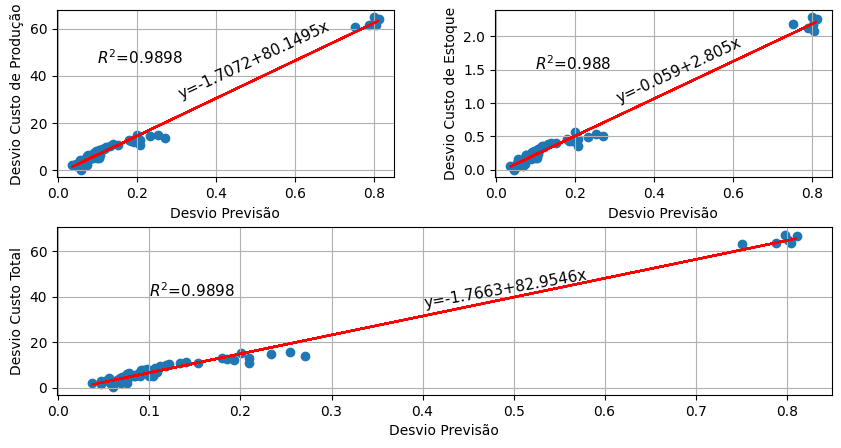

In [50]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,2,1)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_producao)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(0.1, 45, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_producao),4)}', fontsize=11,fontweight=550)
plt.text(0.3, 30, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=25)
plt.plot(desvios,y_pred,color='red')
plt.scatter(desvios,desvio_custo_producao)
plt.grid(axis='both')
plt.xlabel('Desvio Previsão')
plt.ylabel('Desvio Custo de Produção')


ax=fig.add_subplot(2,2,2)
lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_estoque)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(0.1, 1.5, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_estoque),4)}', fontsize=11,fontweight=550)
plt.text(0.3, 1, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=25)
plt.plot(desvios,y_pred,color='red')
plt.scatter(desvios,desvio_custo_estoque)
plt.grid(axis='both')
plt.xlabel('Desvio Previsão')
plt.ylabel('Desvio Custo de Estoque') 

ax=fig.add_subplot(2,1,2)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_total)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(0.1, 40, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_total),4)}', fontsize=11,fontweight=550)
plt.text(0.4, 35, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=10)
plt.plot(desvios,y_pred,color='red')
plt.scatter(desvios,desvio_custo_total)
plt.grid(axis='both')
plt.xlabel('Desvio Previsão')
plt.ylabel('Desvio Custo Total') 

In [614]:
ic_np = pd.read_csv('../Resultados/tabelas/Intervalos_Confianca/NP/IC_NP0')[['yhat1 2.5%','yhat1 97.5%']]
ic_sa = pd.read_csv('../Resultados/tabelas/Intervalos_Confianca/SA/IC_SA0')[['lower demandas','upper demandas']]

In [615]:
import random

# Desvios Neural Prophet

In [616]:
simulacoes = {}
indice = 1
for ic in ic_np.values:
    coluna = []
    for simulacao in range(60):
        coluna.append(random.uniform(ic[0], ic[1]))
    simulacoes[f'x{indice}'] = coluna
    indice+=1

simulacoes = pd.DataFrame(simulacoes)
simulacoes.head(3)
        

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,89.487574,90.686754,90.448773,89.818995,92.777850,91.042960,92.426656,94.528684,92.927758,97.558790,97.310945,97.892066,99.360143,101.110216,101.451738,103.196779,103.341692
1,90.751758,89.870967,90.384477,89.751005,91.086591,92.437276,92.894652,95.263847,96.266458,95.320916,98.926498,97.745859,99.531360,101.936380,103.439393,104.435826,105.334804
2,89.748732,88.913485,90.260785,92.330115,91.697826,91.441187,95.018185,94.651104,94.326520,97.395727,97.052093,98.902058,99.266785,100.790629,101.732182,103.604727,104.700362


In [617]:
import gurobipy as gp
from gurobipy import GRB
def uls(datafile,predictD):
  MAX_CPU_TIME = 3600.0
  EPSILON = 1e-6
  with open(datafile, 'r') as file: 
    linhas = file.readlines()

  # remove linha vazia inicial e elimina os "\n" de cada linha
  linhas = [a.strip() for a in linhas] 

 # ler o tamanho da instancia
    
  N = len(predictD)
  #  N = 5 
      
  H = np.zeros(N)#custo no estoque
  P = np.zeros(N)#custo unitário
  F = np.zeros(N)#custo fixo
  D = np.zeros(N)#demanda

  #Custo unitario para o produto ser fabricado
  P = [float(linhas[0]) for i in range(N)]


  #Custo para se começar a produzir
  F = [float(linhas[1]) for i in range(N)]

  #Custo unitario para o produto ser estocado
  H = [float(linhas[2]) for i in range(N)]

 
  #D = np.fromstring(linhas[5], dtype=float, sep = ' ')
  #Demandas
  D = predictD
  
  #cria o modelo
  m = gp.Model("uls") 

  m.Params.LogToConsole = 0
  m.setParam(GRB.Param.TimeLimit, MAX_CPU_TIME)
  m.setParam(GRB.Param.MIPGap, EPSILON)
  m.setParam(GRB.Param.Threads, 1)

  #Adicionando Variáveis
  x = m.addVars(N, name='x') 
  s = m.addVars(N, name='s')  
  y = m.addVars(N, vtype=GRB.BINARY, name='y') 

  # funcao objetivo
  obj = 0
  for i in range(0, N):
    obj += P[i] * x[i]
    obj += H[i] * s[i]
    obj += F[i] * y[i]

  m.setObjective(obj, GRB.MINIMIZE)


  m.addConstr(x[0] - s[0] == D[0])
  for i in range(1, N):
    m.addConstr(s[i-1] + x[i] - s[i] == D[i])
    
  for i in range(0, N):
    m.addConstr(x[i] - (D[i:N].sum())*y[i] <= 0)

  m.addConstr(s[N-1] == 0)

  # export .lp
	#model.write(file_name+"_model.lp")

  m.optimize()
  tmp = 0
  if m.status == GRB.OPTIMAL:
    tmp = 1


  resultados = {
     'x': [x[i].getAttr("x") for i in x],
     's':  [s[i].getAttr("x") for i in s],
     'y': [y[i].getAttr("x") for i in y],
     'Demanda': list(predictD),
     'ObjVal': m.ObjVal,
     'ObjBound': m.ObjBound,
     'RunTime': m.Runtime,
     'NodeCount': m.NodeCount,
     'Status': tmp,
    }

  return resultados

In [618]:
resultados_simu = [] 
for i in simulacoes.values:
    resultados_simu.append(uls('../Modelo_pi/ULS_instancia.txt',i))

In [619]:
resultados_simu = pd.DataFrame(resultados_simu)

In [620]:
simu_x = describe_var(resultados_simu,'x')
simu_s = describe_var(resultados_simu,'s')
simu_y = describe_var(resultados_simu,'y')
boxPlot_y_simu_np = dataFrame_to_boxPlot(simu_y,'value')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


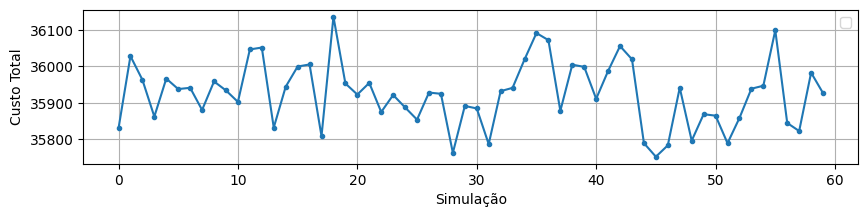

In [621]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

ax=fig.add_subplot(2,1,2)
plt.plot(resultados_simu['ObjVal'],marker='.')
plt.xlabel('Simulação')
plt.ylabel('Custo Total')
plt.grid(axis='both')
plt.legend()

In [622]:
centroide = simulacoes.describe().iloc[1].values
desvios = [np.linalg.norm(centroide_np-simulacao_k) for simulacao_k in simulacoes.values]

In [623]:
custo_total = resultados_simu['ObjVal']

desvio_custo_total = [abs(media_custo_total_np-custo_k) for custo_k in custo_total]

In [624]:
custo_producao = simu_x.sum(axis=1)*20

desvio_custo_producao = [abs(media_custo_producao_np-custo_k) for custo_k in custo_producao]



custo_estoque = simu_s.sum(axis=1)*2

desvio_custo_estoque = [abs(media_custo_estoque_np-custo_k) for custo_k in custo_estoque]

Text(0, 0.5, 'Desvio Custo Total')

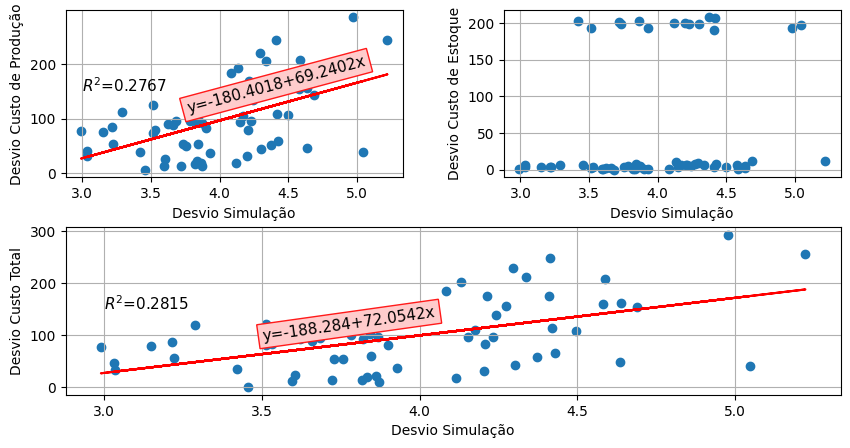

In [632]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,2,1)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_producao)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(3, 150, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_producao),4)}', fontsize=11,fontweight=550)
plt.text(3.75, 110, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=15,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios,y_pred,color='red')

plt.scatter(desvios,desvio_custo_producao)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Produção')

ax=fig.add_subplot(2,2,2)
plt.scatter(desvios,desvio_custo_estoque)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Estoque') 


ax=fig.add_subplot(2,1,2)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_total)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(3, 150, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_total),4)}', fontsize=11,fontweight=550)
plt.text(3.5, 90, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=8,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios,y_pred,color='red')

plt.scatter(desvios,desvio_custo_total)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo Total') 

# Desvios Sarima

In [633]:
simulacoes = {}
indice = 1
for ic in ic_sa.values:
    coluna = []
    for simulacao in range(60):
        coluna.append(random.uniform(ic[0], ic[1]))
    simulacoes[f'x{indice}'] = coluna
    indice+=1

simulacoes = pd.DataFrame(simulacoes)
simulacoes.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,89.493833,86.895827,90.205468,87.288481,90.140638,90.884220,91.824818,96.056529,94.500538,96.036507,97.248730,100.290014,101.420572,103.207407,101.338717,104.023265,103.335110
1,87.700099,89.535617,89.463648,90.260649,89.430608,90.900515,93.600264,95.551835,94.385376,95.248723,99.716119,99.851544,97.581362,100.241257,102.209323,101.804630,106.772051
2,89.720653,91.083502,90.199731,89.281180,91.504101,90.855493,94.856041,92.499840,97.889300,98.056875,96.845107,99.833413,100.347742,103.106072,100.092229,105.066819,107.459575


In [634]:
resultados_simu = [] 
for i in simulacoes.values:
    resultados_simu.append(uls('../Modelo_pi/ULS_instancia.txt',i))
resultados_simu = pd.DataFrame(resultados_simu)

In [635]:
simu_x = describe_var(resultados_simu,'x')
simu_s = describe_var(resultados_simu,'s')

In [636]:
simu_y = describe_var(resultados_simu,'y')

In [637]:
boxPlot_y_simu = dataFrame_to_boxPlot(simu_y,'value')

Text(0, 0.5, 'Qtd Simulações')

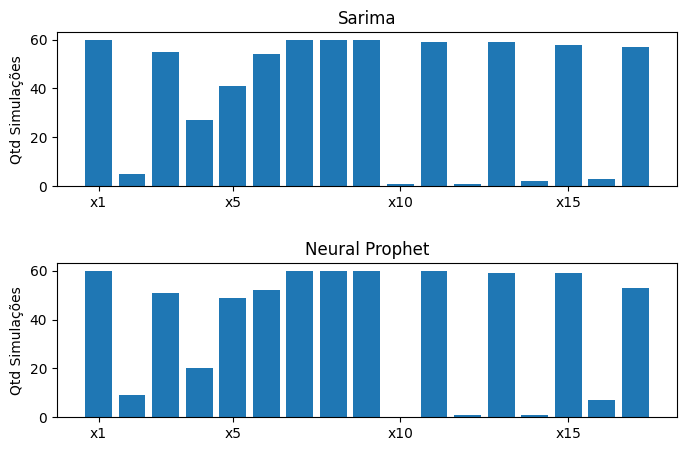

In [645]:
fig=plt.figure(figsize=(8,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
dataPlot = boxPlot_y_simu.groupby('x').sum()

ax=fig.add_subplot(2,1,1)
ax.set_title('Sarima')
plt.bar([f'x{i}' for i in range(1,18)],dataPlot['value'].values)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(simu_y.columns)/5)+1)])
plt.ylabel('Qtd Simulações')

ax=fig.add_subplot(2,1,2)
ax.set_title('Neural Prophet')
plt.bar([f'x{i}' for i in range(1,18)],boxPlot_y_simu_np.groupby('x').sum()['value'].values)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(simu_y.columns)/5)+1)])
plt.ylabel('Qtd Simulações')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


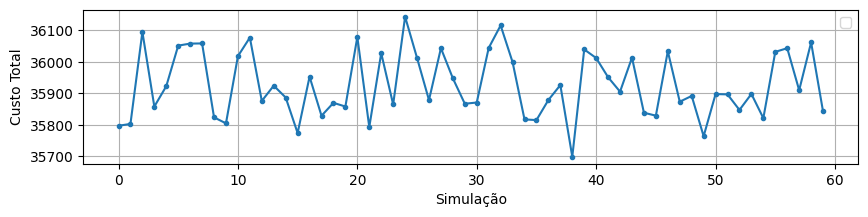

In [640]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

ax=fig.add_subplot(2,1,2)
plt.plot(resultados_simu['ObjVal'],marker='.')
plt.xlabel('Simulação')
plt.ylabel('Custo Total')
plt.grid(axis='both')
plt.legend()

In [641]:
result_x_sar.values[0].sum()

1630.4995773628075

In [642]:
custo_total = resultados_simu['ObjVal']

desvio_custo_total = [abs(resultados_sar['ObjVal'][0]-custo_k) for custo_k in custo_total]


custo_producao = simu_x.sum(axis=1)*20

desvio_custo_producao = [abs(result_x_sar.values[0].sum()*20-custo_k) for custo_k in custo_producao]



custo_estoque = simu_s.sum(axis=1)*2

desvio_custo_estoque = [abs(result_s_sar.values[0].sum()*2-custo_k) for custo_k in custo_estoque]




Text(0, 0.5, 'Desvio Custo Total')

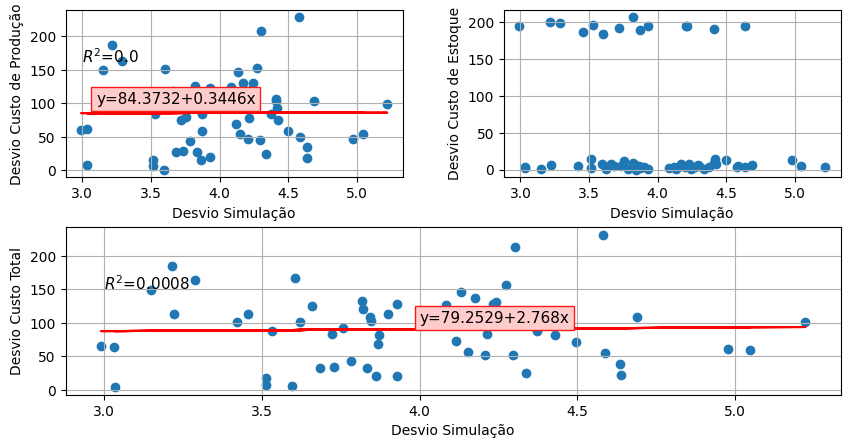

In [643]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,2,1)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_producao)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(3, 160, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_producao),4)}', fontsize=11,fontweight=550)
plt.text(3.1, 100, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=0,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios,y_pred,color='red')

plt.scatter(desvios,desvio_custo_producao)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Produção')



ax=fig.add_subplot(2,2,2)
plt.scatter(desvios,desvio_custo_estoque)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Estoque')



ax=fig.add_subplot(2,1,2)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_total)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(3, 150, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_total),4)}', fontsize=11,fontweight=550)
plt.text(4, 100, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=0,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios,y_pred,color='red')

plt.scatter(desvios,desvio_custo_total)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo Total') 